<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_04_Multiple_Sequence_Alignment_visualizing_and_filtering_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Sequence Alignment - visualizing and filtering alignment**

In [ ]:
install.packages("gplots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Making a Heatmap using the heatmap.2 package**

In [ ]:
library(gplots) #library that contains functions for drawing plots like heatmap.2


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [ ]:
#load and prepare data
msa1 <- read.csv("https://raw.githubusercontent.com/PineBiotech/omicslogic/master/SARS_CoV_2_1.csv", header=TRUE)

# **Example 1:**
In our first example, let’s just visualize a certain small portion of the genome alignment selecting 50 nucleotide positions:

In [ ]:
#prepare a numeric matrix for msa1 data frame
msa1m <- data.matrix(msa1)
#remove the "POS" column
msa1 <- msa1[,-1]

In [ ]:
#select from the letter data frame
msa1sel <- msa1[21000:21050,]

#select from the numeric matrix
msa1msel <- msa1m[21000:21050,]

#for numeric matrix, make sure to add the position to row names
row.names(msa1msel) <- msa1msel[,1]

#now, remove the POS column from the input data
msa1msel <- msa1msel[,-1]

In [ ]:
#transpose
msa1selT <- t(msa1sel)
msa1mselT <- t(msa1msel)

In [ ]:
#set colors and margins for plot
if("-" %in% msa1selT){ #first, check if we have 4 or 5 characters (I am assuming that TCGA will be present, so only looking for "-")
  TCGAcolors <- c("white", "lightgreen", "pink", "lightblue", "yellow")
  names(TCGAcolors) = c(1,2,3,4,5) #labels = c("-","A","T","C","G")
} else {TCGAcolors <- c("lightgreen", "pink", "lightblue", "yellow") }

In [ ]:
#set plot margins
par(cex.main=0.9, family="avenir")

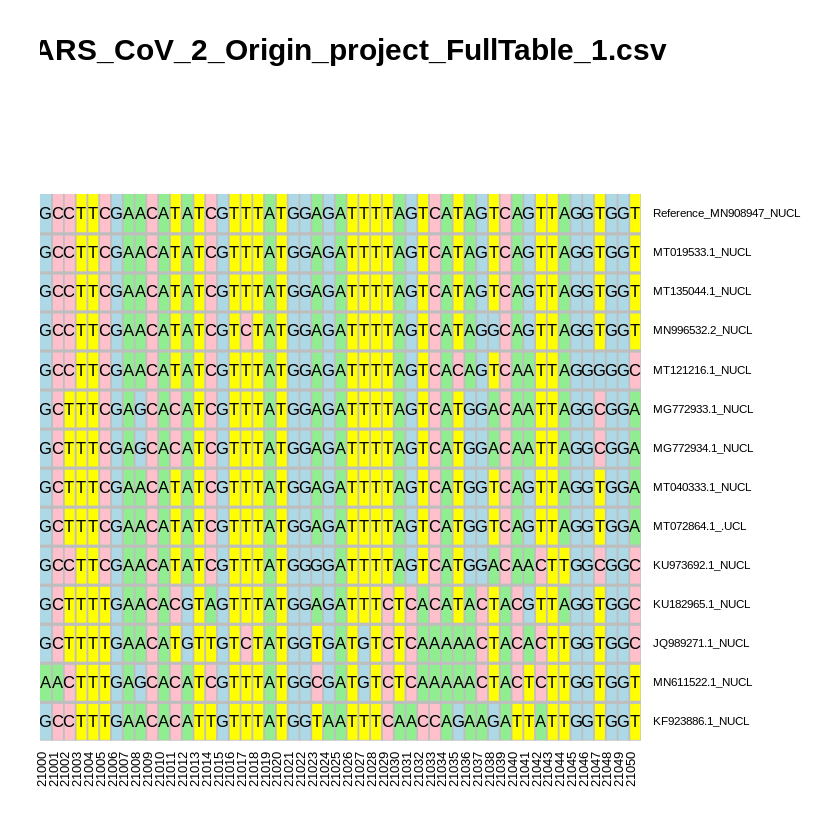

In [ ]:
#draw heat map for first selected positions of alignment
heatmap.2(msa1mselT, #data source matrix

          #main settings
          cexRow = 0.7, #row name font size
          col = TCGAcolors, #set colors
          dendrogram = "none", #remove dendrogram
          Rowv = FALSE, #no reordering for rows
          Colv = FALSE, #no reordering for columns
          density.info="none", #remove density info
          trace="none", #remove row and column lines

          offsetRow=0.1, #change position of the row names
          offsetCol=0.1, #change position of the column names

          #add gray borders between cells
          sepwidth=c(0.05,0.05), #sets separation width and height
          sepcolor="gray", #color for border
          colsep=1:ncol(msa1mselT), #add separation for number of columns in source data
          rowsep=1:nrow(msa1mselT), #add separation for number of rows in source data

          #plot title
          main = "SARS_CoV_2_Origin_project_FullTable_1.csv", #heat map title

          #plot margins
          margins = c(5,10), #set margins
          lwid=c(0.2,4),
          lhei=c(0.9,3),

          #adding letters inside the heatmap
          notecex=1.0, #size of font inside each cell
          cellnote = msa1selT, #data to use in cells
          notecol="black", #font color for cells

          #legend
          key = FALSE
)

# **Example 2:**
In the second example, we will take the selected region and prepare a report on only those positions that contain variation from any of the samples as compared to the reference genome:



In [ ]:
#select only data where any sample has a variant to create a report
new_df <- msa1sel[!(msa1sel[2] == msa1sel[3] & msa1sel[2] == msa1sel[4] & msa1sel[2] == msa1sel[5] & msa1sel[2] == msa1sel[6] & msa1sel[2] == msa1sel[7] & msa1sel[2] == msa1sel[8] & msa1sel[2] == msa1sel[9] & msa1sel[2] == msa1sel[10] & msa1sel[2] == msa1sel[11] & msa1sel[2] == msa1sel[12] & msa1sel[2] == msa1sel[13] & msa1sel[2] == msa1sel[14]),]
new_dfT <- t(new_df)

In [ ]:
#select only data where any sample has a variant in the matrix
new_matrix <- msa1msel[!(msa1msel[,2] == msa1msel[,3] & msa1msel[,2] == msa1msel[,4] & msa1msel[,2] == msa1msel[,5] & msa1msel[,2] == msa1msel[,6] & msa1msel[,2] == msa1msel[,7] & msa1msel[,2] == msa1msel[,8] & msa1msel[,2] == msa1msel[,9] & msa1msel[,2] == msa1msel[,10] & msa1msel[,2] == msa1msel[,11] & msa1msel[,2] == msa1msel[,12] & msa1msel[,2] == msa1msel[,13] & msa1msel[,2] == msa1msel[,14]),]
new_matrixT <- t(new_matrix)

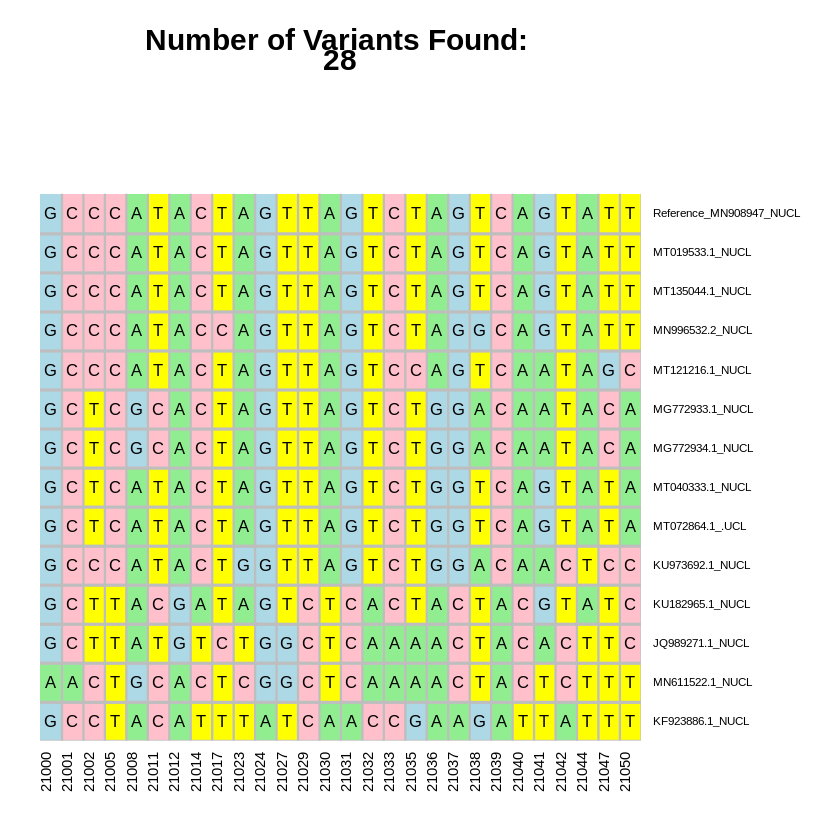

In [ ]:
#draw heat map for only variants
heatmap.2(new_matrixT, #data source

          #main settings
          cexRow = 0.7, #row name font size
          col = TCGAcolors, #set colors
          dendrogram = "none", #remove dendrogram
          Rowv = FALSE, #no reordering for rows
          Colv = FALSE, #no reordering for columns
          density.info="none", #remove density info
          trace="none", #remove row and column lines

          offsetRow=0.1, #change position of the row names
          offsetCol=0.1, #change position of the column names

          #add gray borders between cells
          sepwidth=c(0.05,0.05), #sets separation width and height
          sepcolor="gray", #color for border
          colsep=1:ncol(new_matrixT), #add separation for number of columns in source data
          rowsep=1:nrow(new_matrixT), #add separation for number of rows in source data

          #plot title
          main = cbind("Number of Variants Found: ",ncol(new_matrixT)), #heat map title

          #plot margins
          margins = c(5,10), #set margins
          lwid=c(0.2,4),
          lhei=c(0.9,3),

          #adding letters inside the heatmap
          notecex=1.0, #size of font inside each cell
          cellnote = new_dfT, #data to use in cells
          notecol="black", #font color for cells

          #legend
          key = FALSE
)


# **Making a Heatmap using ggplot2**

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

In [ ]:
#load data
data <- read.csv("https://raw.githubusercontent.com/PineBiotech/omicslogic/master/SARS_CoV_2_1.csv", header=TRUE)

In [ ]:
#remove the "POS" column
msa <- data[,-1]

In [ ]:
#select only some rows
msa_sel <- msa[21050:21100,] #select specific rows from the letter data frame
msa_selT <- t(msa_sel) #transpose data frame

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#load library
library(reshape2)
#transform the data for ggplot
melted_mat <- melt(msa_selT)

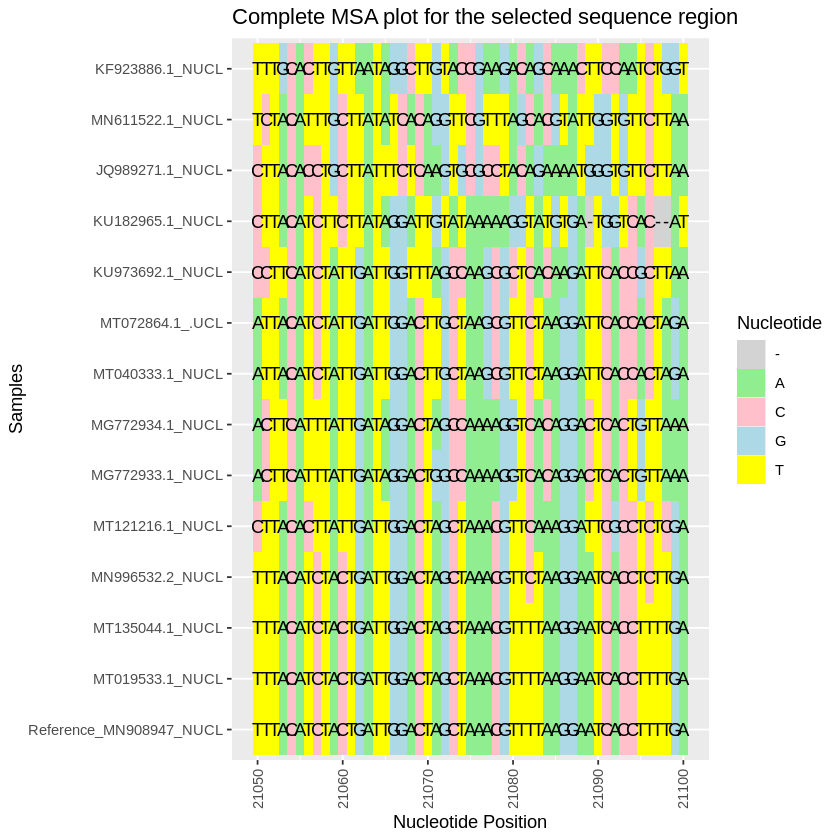

In [ ]:
#Create the plot object
plot1 <- ggplot(data = melted_mat, aes(x=Var2, y=Var1, fill=value)) + geom_tile() + geom_text(aes(label = value))  + xlab("Nucleotide Position") + ylab("Samples" ) + labs(fill = "Nucleotide") + labs(title="Complete MSA plot for the selected sequence region") + scale_fill_manual(values=c("lightgray", "lightgreen", "pink", "lightblue", "yellow")) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

#draw the plot
plot(plot1)

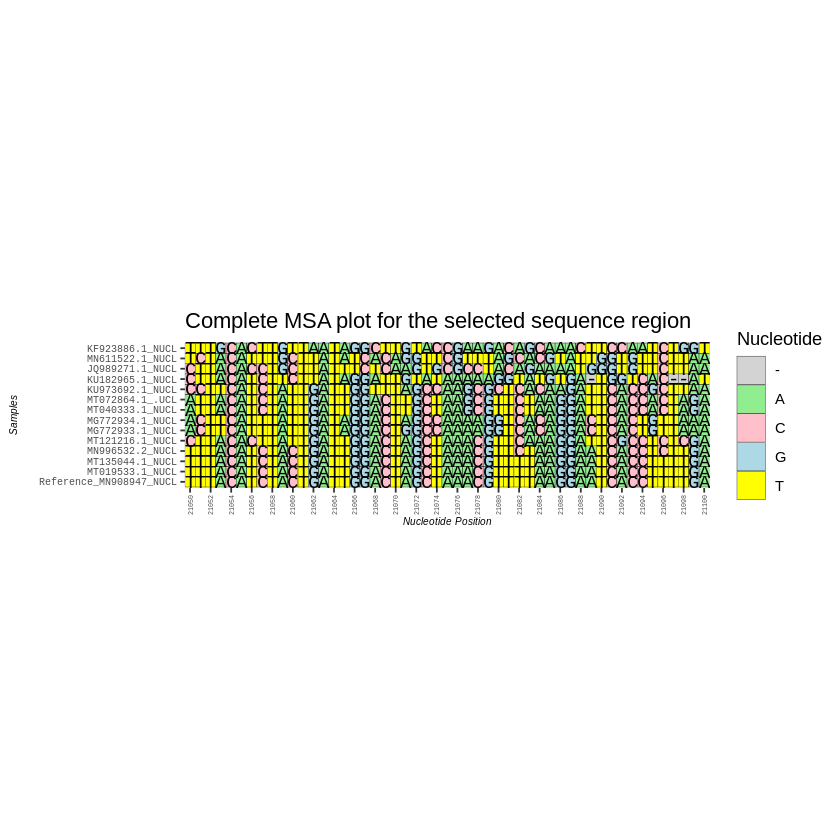

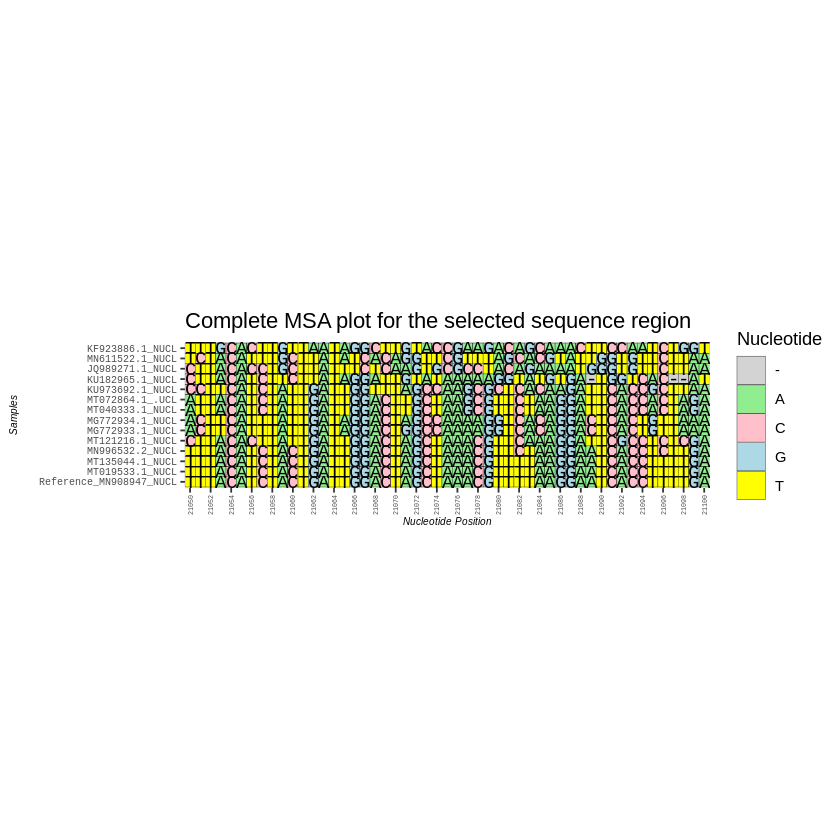

In [ ]:
#create plot object
(plot1 <- ggplot(data = melted_mat, aes(x=Var2, y=Var1, fill=value)) + #add data and fill cells
    geom_tile(colour = "black") + #add black border around cells
    geom_text(aes(label = value), size=4, family = "Avenir Next") + #change text settings for text inside the cells
    coord_equal() + #this controls the cell proportion
    xlab("Nucleotide Position") + #adds label to X axis
    ylab("Samples") + #adds label to Y axis
    labs(fill = "Nucleotide") + #Title for legend
    labs(title="Complete MSA plot for the selected sequence region") + #main title
    scale_x_continuous(breaks = seq(21000, 21100, by = 2), expand = c(0, 0)) + #adds breaks every 2 positions
    scale_fill_manual(values = c("lightgray", "lightgreen", "pink", "lightblue", "yellow")) + #adds color scheme
    theme(axis.text = element_text(size=10, family = "Avenir Next"),
          axis.title = element_text(size=6, vjust = 2, face="italic"),
          axis.text.x = element_text(angle = 90, vjust = 0.5, size = 4),
          axis.text.y = element_text(size = 6),
    ))

#Draw a plot
plot(plot1)

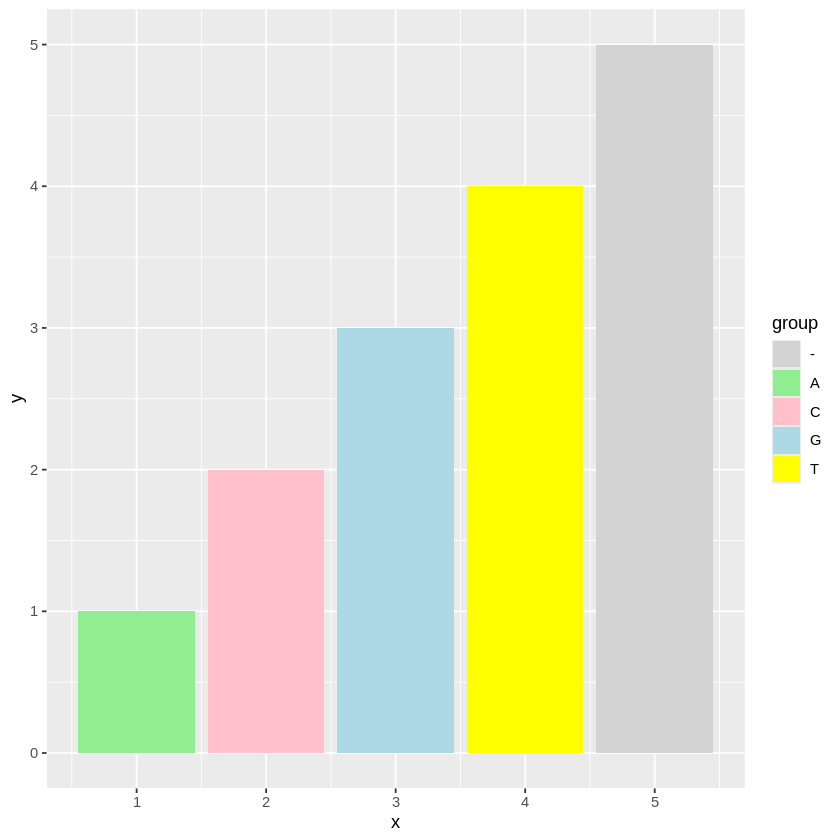

In [ ]:
library(ggplot2)

# Example data
df <- data.frame(
  x = 1:5,
  y = 1:5,
  group = c("A", "C", "G", "T", "-")
)

# Plot
ggplot(df, aes(x = x, y = y, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("-" = "lightgray", "A" = "lightgreen", "C" = "pink", "G" = "lightblue", "T" = "yellow"))


**Report for COVID-19 proteins**

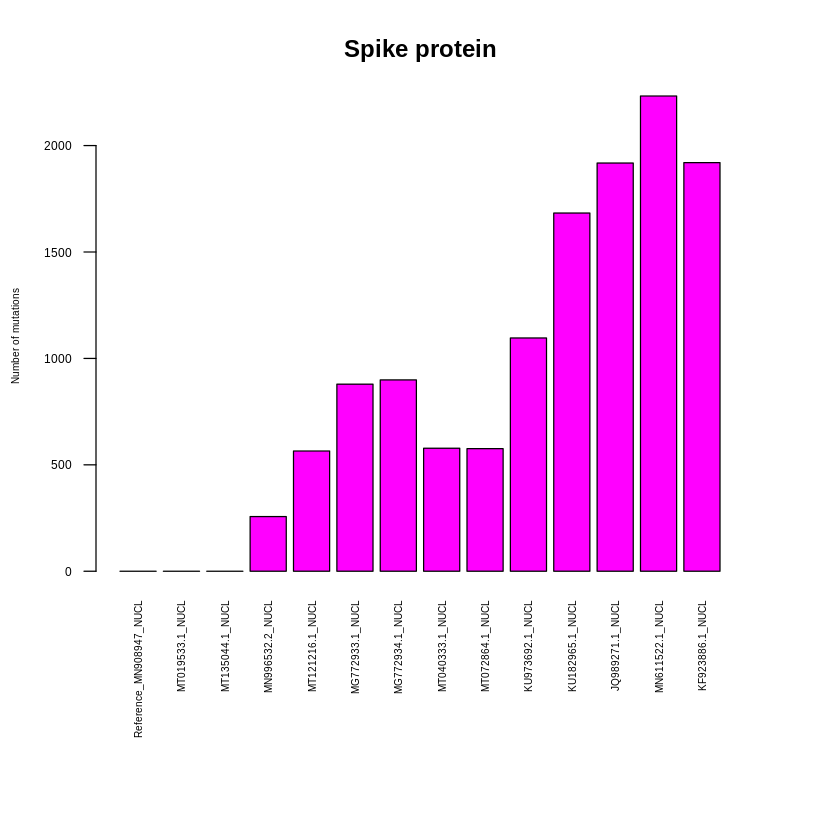

In [ ]:
#Load data
msa <- read.csv("https://raw.githubusercontent.com/pine-bio-support/COVID-19-origin/main/SARS_CoV_2_1.csv", header=TRUE)

#Define selected positions (Here, we are defining position for spike protein)


startnt <- 21563
endnt <- 25384


#select specified rows from the letter data frame
msa_sel1 <- msa[startnt:endnt,]


#Extract position column
pos <- msa_sel1[1]


msa_sel <- msa_sel1[,-1]  #remove the "POS" column
#Report on the number of mutations in each sample:
x <- ncol(msa_sel)


#create an empty data frame to store the new data
daf2 <- data.frame(matrix(0, ncol = x+1, nrow = (endnt-startnt)+1))
colnames(daf2) <- colnames(msa_sel)


#define i value
i=2


for (i in 2:x) {
  daf2[,i] <- ifelse(msa_sel[,1]== msa_sel[,i],0,1)
}


#Load library
library(dplyr) #required for modification of data


#Remove reference genome column and last column (NA column) from the dataframe
daf3 <- select(daf2, -ncol(daf2))


#count the number of mutations in each sample
summ1 <- colSums(daf3)


#make a barplot
par(mar=c(11,4,4,4))
barplot(summ1, las=2, main= "Spike protein", cex.axis = 0.6, cex.lab=0.5, cex.names=0.5,  ylab="Number of mutations", col="magenta", space=0.2)



**Table for type of variants**

In [ ]:
#Load data
msa <- read.csv("https://raw.githubusercontent.com/pine-bio-support/COVID-19-origin/main/SARS_CoV_2_1.csv", header=TRUE)

#Define selected positions (Here, we are defining position for spike protein)


startnt <- 21563
endnt <- 25384


#select specified rows from the letter data frame
msa_sel1 <- msa[startnt:endnt,]


#Extract position column
pos <- msa_sel1[1]


msa_sel <- msa_sel1[,-1]  #remove the "POS" column
#Report on the number of mutations in each sample:
x <- ncol(msa_sel)


#create an empty data frame to store the new data
df_new1 <- data.frame(matrix(0, ncol = x+1, nrow = (endnt-startnt)+1))
colnames(df_new1) <- colnames(msa_sel)


#define i value
i=2


#Create a for loop, to assign variant (i.e. nucleotide mutated to which new variant/nucleotide). Here, we assigning “-” if there is no mutation, else assigning to mutation


for (i in 2:x) {

  df_new1[,i] <- ifelse(msa_sel[,1]== msa_sel[,i],"-", paste0(msa_sel[,1],">",msa_sel[,i]))
}


#Load library
library(dplyr) #required for modification of data


#Remove reference genome column and last column (NA column) from the dataframe
df_new2 <- select(df_new1,-1, -ncol(df_new1))


#Add position column
final_df <- cbind(pos, df_new2)


#Check whether output is correct
head(final_df)

,POS,MT019533.1_NUCL,MT135044.1_NUCL,MN996532.2_NUCL,MT121216.1_NUCL,MG772933.1_NUCL,MG772934.1_NUCL,MT040333.1_NUCL,MT072864.1_NUCL,KU973692.1_NUCL,KU182965.1_NUCL,JQ989271.1_NUCL,MN611522.1_NUCL,KF923886.1_NUCL
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
21563,21563,-,-,-,-,T>C,T>C,-,-,-,-,-,-,-
21564,21564,-,-,-,-,-,-,-,-,-,-,-,-,-
21565,21565,-,-,-,-,-,-,-,-,-,-,-,-,-
21566,21566,-,-,-,-,T>G,T>A,-,-,-,T>C,T>A,-,T>A
21567,21567,-,-,-,-,-,-,-,-,-,-,-,-,-
21568,21568,-,-,-,-,-,-,-,-,-,-,-,-,-


Here's an explanation of the updated code to help your students understand each step:

### Explanation of the Code

#### Load Data
```r
msa <- read.csv("https://raw.githubusercontent.com/pine-bio-support/COVID-19-origin/main/SARS_CoV_2_1.csv", header=TRUE)
```
- This line loads the dataset from the given URL into a data frame called `msa`.

#### Define Selected Positions
```r
startnt <- 21563
endnt <- 25384
```
- `startnt` and `endnt` define the start and end positions for the spike protein region in the dataset.

#### Select Specified Rows
```r
msa_sel1 <- msa[startnt:endnt,]
```
- Selects rows from `startnt` to `endnt` from the `msa` data frame, focusing on the spike protein region.

#### Extract Position Column
```r
pos <- msa_sel1[1]
```
- Extracts the first column (position column) and stores it in `pos`.

#### Remove the "POS" Column
```r
msa_sel <- msa_sel1[,-1]
```
- Removes the position column from `msa_sel1` to create `msa_sel`.

#### Report on the Number of Mutations in Each Sample
```r
x <- ncol(msa_sel)
```
- `x` stores the number of columns (samples) in `msa_sel`.

#### Create an Empty Data Frame
```r
df_new1 <- data.frame(matrix(0, ncol = x+1, nrow = (endnt-startnt)+1))
colnames(df_new1) <- colnames(msa_sel)
```
- Creates an empty data frame `df_new1` with the same number of rows as the selected range and `x+1` columns. It assigns column names from `msa_sel`.

#### Define `i` Value and Populate Data Frame
```r
i = 2
for (i in 2:x) {
  df_new1[,i] <- ifelse(msa_sel[,1] == msa_sel[,i], "-", paste0(msa_sel[,1], ">", msa_sel[,i]))
}
```
- Iterates through each column, comparing it to the first column. If the values match, it assigns `"-"`; otherwise, it assigns a string indicating the mutation (e.g., `"A>G"`).

#### Load Required Library
```r
library(dplyr)
```
- Loads the `dplyr` library for data manipulation.

#### Remove Reference Genome Column
```r
df_new2 <- select(df_new1, -1, -ncol(df_new1))
```
- Removes the first column and the last column (assumed to be the reference genome column) from `df_new1`.

#### Add Position Column
```r
final_df <- cbind(pos, df_new2)
```
- Combines the position column `pos` with the modified data frame `df_new2`.

#### Check the Output
```r
head(final_df)
```
- Displays the first few rows of `final_df` to check if the output is correct.

### Summary
This code prepares a detailed report on nucleotide mutations in the spike protein region of the dataset. It compares each sample to a reference sequence, marks positions with mutations, and summarizes the results in a new data frame.

In [ ]:
#Write into a file
write.table(final_df, file="variant_info.txt", row.names = F, sep ="\t")

This line writes the final_df data frame to a text file named "variant_info.txt".
file="variant_info.txt" specifies the file name.
row.names = FALSE ensures that row names are not written to the file.
sep = "\t" sets the delimiter to a tab character, creating a tab-separated file.